In [1]:
# %load_ext autoreload
# %autoreload 2
import os
import lightkurve as lk
import pandas as pd
import numpy as np
import dynesty
from granulation_fitting import granulation_fit 
from matplotlib.pyplot import *
rcParams['font.size'] = 18

/home/nielsemb/.local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
download_dir = '/home/nielsemb/work/mounts/Bluebear_data/data'

workDir = '/home/nielsemb/work/repos/granulation'

prior_data = pd.read_csv(os.path.join(*[workDir, 'prior_data.csv']))

In [3]:
test_numaxs = np.linspace(min(prior_data['numax']), max(prior_data['numax']), 10)
idxs = np.array([np.argmin(abs(prior_data['numax'].values - nu)) for nu in test_numaxs])
print(idxs)

[ 8615  8657  4241  8568  3205 13441 13325  2690  2341  6323]


In [4]:
prior_data[prior_data['ID']=='KIC10000547']

,ID,numax,dnu,teff,bp_rp,eps,d02,alpha,env_height,env_width,mode_width
7,KIC10000547,2.205317,1.122994,3.716838,1.139611,1.266934,0.247568,-2.050085,1.357384,1.270015,-0.797389


In [5]:
def wfunc(self, n=1):
     
    ppf, pdf = self.getQuantileFuncs(self.data_F[:, :1])

    w = 1/pdf[0](self.data_F[:, 0])**n
       
    return w

KIC10000108
Using cached search result.
Loading fits files from cache.


8579it [08:09, 17.52it/s, +200 | bound: 262 | nc: 1 | ncall: 266224 | eff(%):  3.300 | loglstar:   -inf < -222119.460 <    inf | logz: -222160.737 +/-  0.428 | dlogz:  0.001 >  0.209]


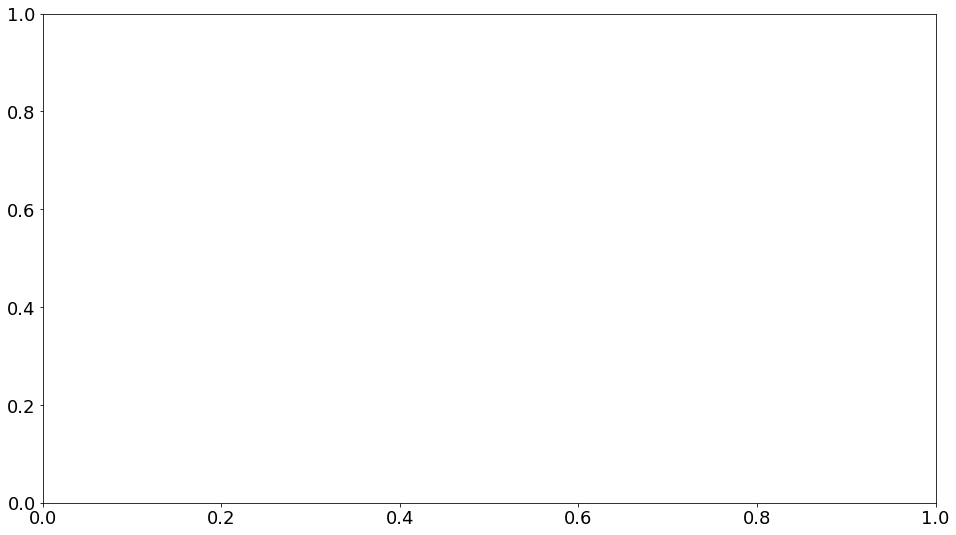

In [8]:
cornerN = 5000

figM, axM = subplots(figsize=(16,9))
 
i = 0

ID = prior_data.loc[i, 'ID']
print(ID)

outputDir = os.path.join(*[workDir, 'results', ID])

if not os.path.exists(outputDir):
    os.makedirs(outputDir)

_numax = prior_data.loc[i, 'numax']

numax = [10**_numax, 0.1*10**_numax]

gfit = granulation_fit(ID, numax, download_dir, pcadim=0, weights=wfunc, weight_args={'n':2}, N=200)

gfit.plotModel(figM, axM, outputDir=outputDir);
axM.clear()

sampler, samples = gfit.runDynesty()

gfit.storeResults(outputDir)

gfit.plotModel(figM, axM, samples, outputDir=outputDir);
axM.clear()

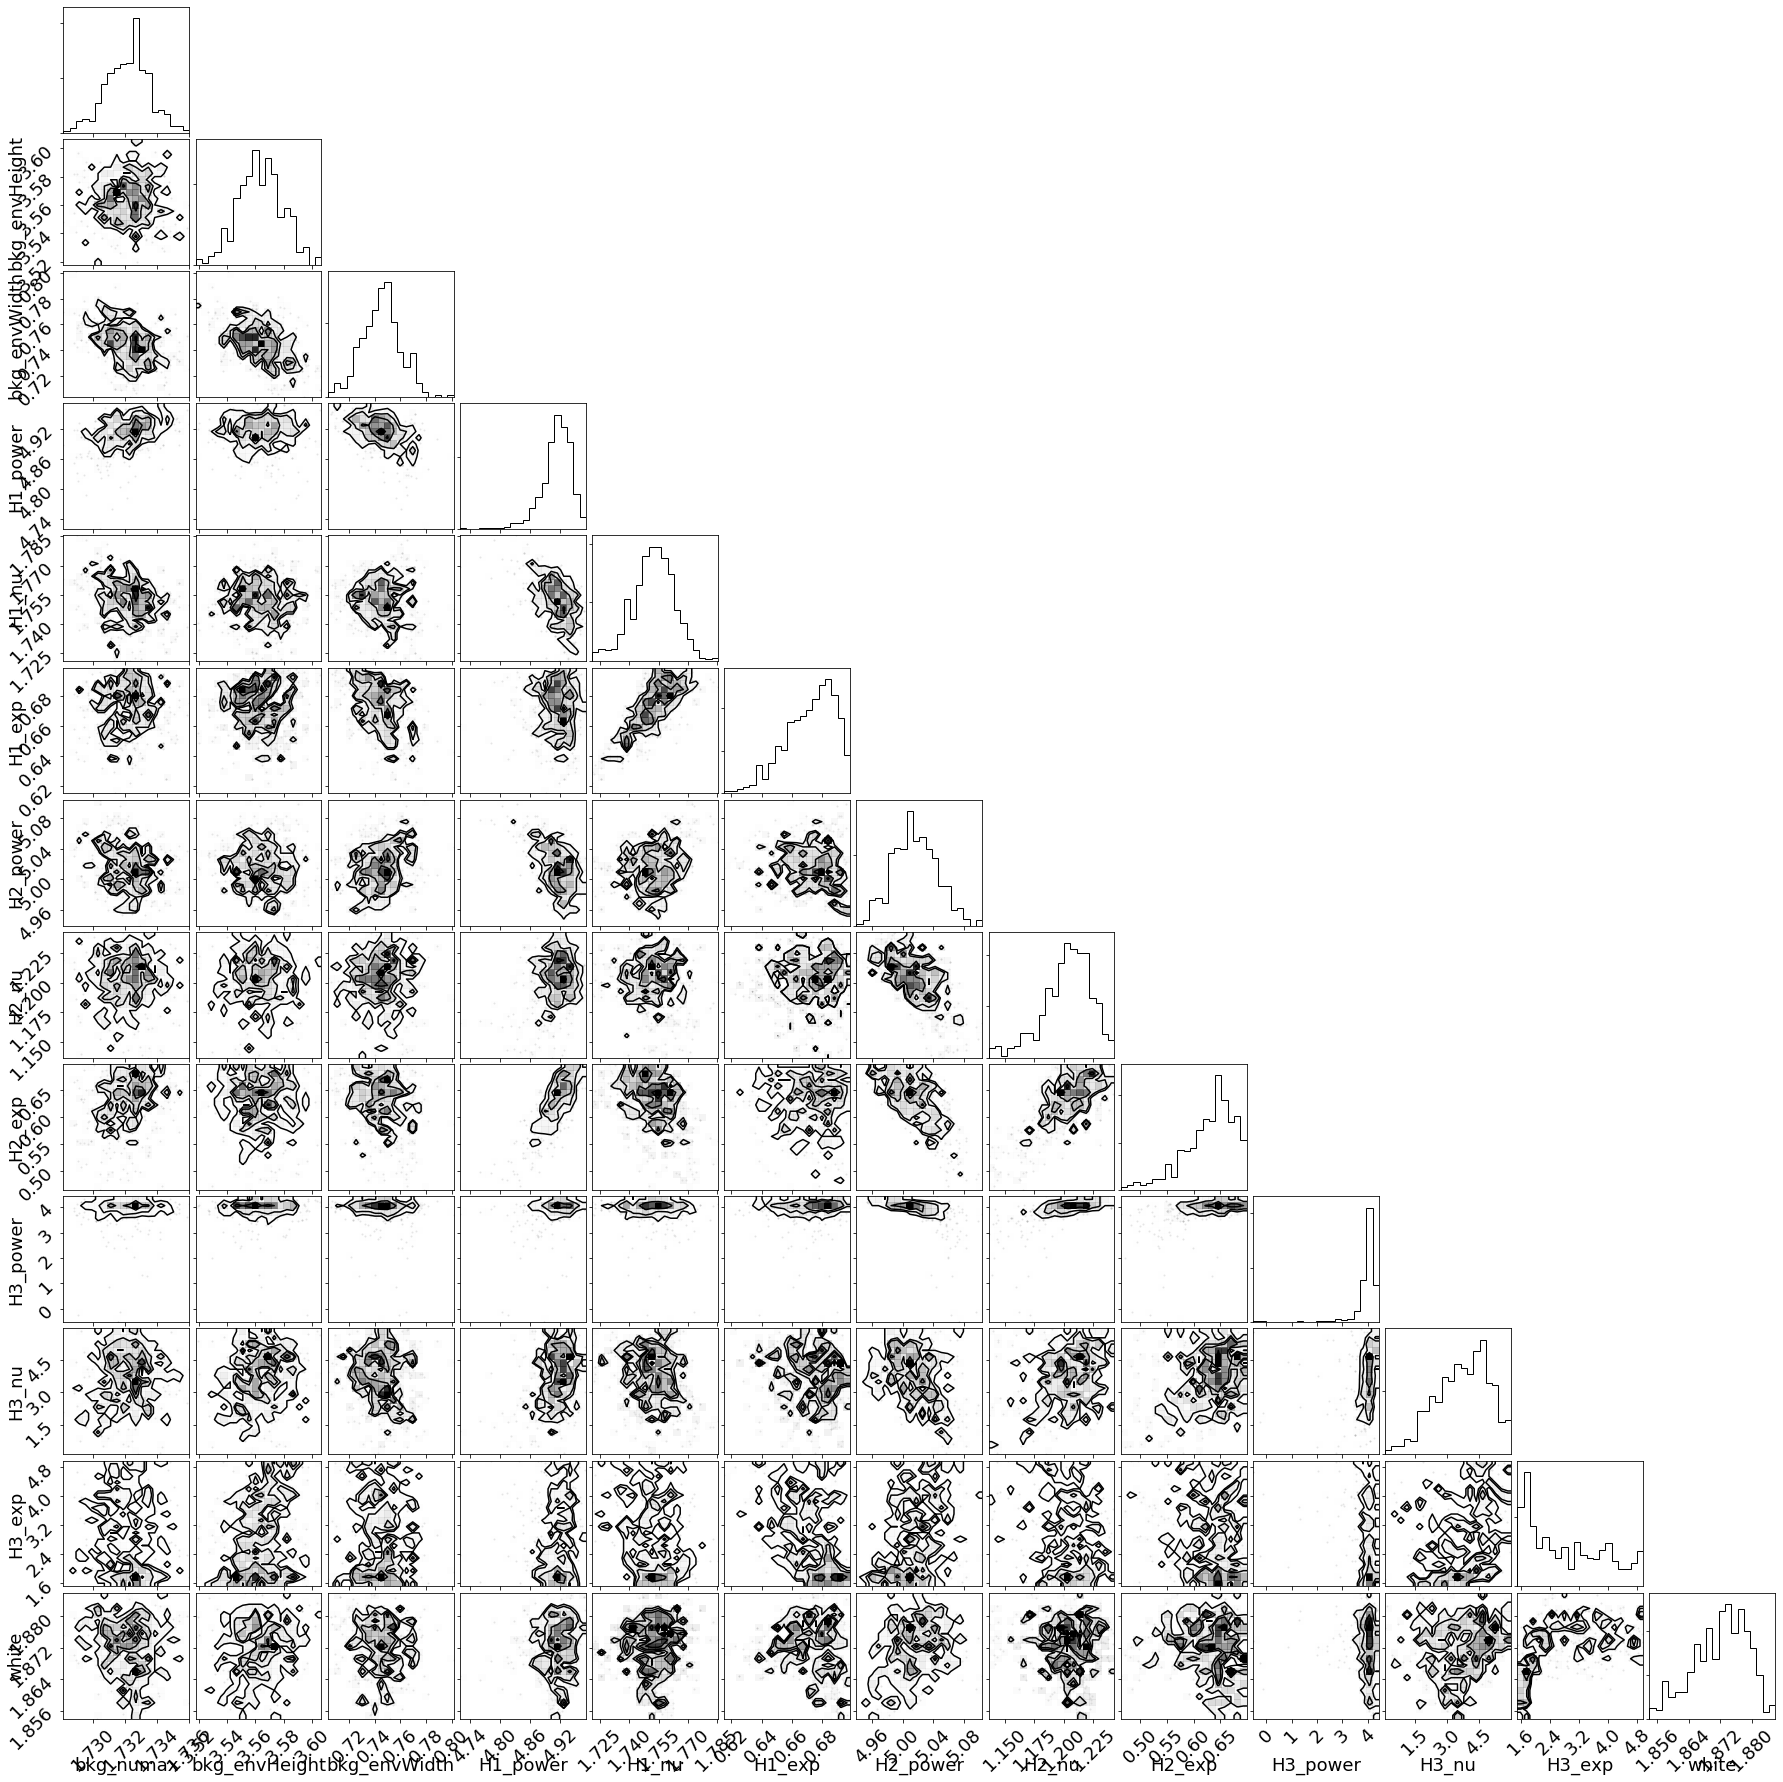

In [9]:
fig, ax = subplots(13,13, figsize=(25,25))
gfit.makeFullCorner(fig, samples)

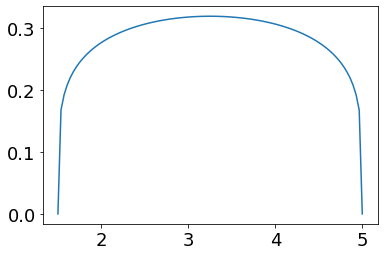

In [10]:
pr = gfit.priors[5]
x = np.linspace(pr.ppf(0), pr.ppf(1), 100)
plot(x, pr.pdf(x))

In [ ]:
import corner
corner.corner(samples)

In [ ]:
sampler_stat, samples_stat = gfit.runDynesty(dynamic=False)
sampler_dyn, samples_dyn = gfit.runDynesty(dynamic=True)

In [ ]:
from dynesty import plotting as dyplot

rfig, raxes = dyplot.runplot(sampler_stat.results)
rfig, raxes = dyplot.runplot(sampler_dyn.results)

In [ ]:
import corner
fig = corner.corner(samples_stat, color='C0', hist_kwargs={'density': True});
corner.corner(samples_dyn, fig=fig, color='C1', hist_kwargs={'density': True});

In [ ]:
fig, ax = subplots(13,13, figsize=(20,20))
gfit.makeFullCorner(fig, samples_stat)
gfit.makeFullCorner(fig, samples_dyn)


In [ ]:
gfit.DR.makeTrainingCorner()

In [ ]:
figM, axM = subplots(figsize=(16,9))

gfit.plotModel(figM, axM, samples, outputDir=outputDir);

In [ ]:
figM, axM = subplots(figsize=(16,9))
gfit.plotModel(figM, axM, samples_stat);

In [ ]:
figM, axM = subplots(figsize=(16,9))
gfit.plotModel(figM, axM, samples_dyn);

In [ ]:
makeFmakeFullCornerCornerCornerCornerr

In [ ]:
plot(-sampler_stat.results.logvol, np.exp(sampler_stat.results.logl-sampler_stat.results.logl.max()))
plot(-sampler_dyn.results.logvol, np.exp(sampler_dyn.results.logl-sampler_stat.results.logl.max()))


In [ ]:
import scipy.special as ss
ss.logsumexp(sampler_dyn.results.logl.max(), -sampler_stat.results.logl.max())

In [ ]:
sampler_stat.results.logl.max()

In [ ]:
prior_samples = np.array([gfit.ptform(np.random.uniform(low=0, high=1, size=gfit.ndim)) for i in range(30)])
figM, axM = subplots(figsize=(16,9))

gfit.plotModel(figM, axM, prior_samples, outputDir=outputDir);


In [ ]:


fig, ax = subplots()
ax.axhline(10**_numax)
for k in range(0, 20, 4):
    gfit = granulation_fit(ID, numax, download_dir, pcadim=3, weights=wfunc, weight_args={'n':k})

    mu_pr = np.zeros(gfit.ndim) + 0.5

    theta = gfit.ptform(mu_pr)

    params = gfit.unpackParams(theta)

    ax.plot(k, params[0], 'o')
    ax.plot(k, 10**gfit.DR.mu[0], 'o', color='k')

In [ ]:
def wfunc(self, n=1):
     
    ppf, pdf = self.getQuantileFuncs(self.data_F[:, :1])

    w = 1/pdf[0](self.data_F[:, 0])**n
       
    return w

from DR import PCA

import utils

_numax = prior_data.loc[13441, 'numax']

numax = [10**_numax, 0.1*10**_numax]

numax = utils.to_log10(*numax)          

pcalabels = ['bkg_numax', 'bkg_envHeight', 'bkg_envWidth',
             'H1_power', 'H1_nu', 'H1_exp',
             'H2_power', 'H2_nu', 'H2_exp',] 

P_test = PCA(numax, pcalabels, weights=wfunc, weight_args={'n':2}, N=1000)

# P_test.fit_weightedPCA(2)

In [ ]:
from dynesty import plotting as dyplot

# Plot a summary of the run.
rfig, raxes = dyplot.runplot(sampler.results)

# Plot traces and 1-D marginalized posteriors.
tfig, taxes = dyplot.traceplot(sampler.results)

# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(sampler.results)
 

In [ ]:
gfit2 = granulation_fit(ID, numax, download_dir, pcadim=2, weights=wfunc, weight_args={'n':2}, N=200)
gfit9 = granulation_fit(ID, numax, download_dir, pcadim=9, weights=wfunc, weight_args={'n':2}, N=200)


In [ ]:
gfit2.DR.makeTrainingCorner()

In [ ]:
gfit9.DR.makeTrainingCorner()

In [ ]:
u = np.random.uniform(0, 1, len(gfit.priors)*2000).reshape((-1, len(gfit.priors)))

theta = np.array([gfit.ptform(u[i, :]) for i in range(2000)])

In [ ]:
L = np.array([gfit.lnlike(theta[i, :]) for i in range(2000)])

In [ ]:
len(L[~np.isinf(L)])

In [ ]:
mod, _mod, _, extra = gfit.model(theta[0, :])

In [ ]:
gfit._lnlike(mod)

In [ ]:
loglog(mod)

In [ ]:
theta_inv = np.array([gfit9.DR.inverse_transform(theta[i, :gfit9.DR.dims_R]) for i in range(2000)])

In [ ]:
scatter(theta_inv[:, 0], theta_inv[:, 4]-theta_inv[:, 0])

In [ ]:
hist(10**samples[:, 5])

In [ ]:
fig, ax = subplots(13,13, figsize=(25,25))

gfit.makePriorCorner(fig)